<a href="https://colab.research.google.com/github/IshanHegde/Comparision-of-Binary-Classification-Models-on-Bank-Deposit-sales-campaign/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
import sklearn.metrics as metrics
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
plt.rcParams["figure.figsize"]=(15,10)

## Importing file 

### Reupload the file everytime you start a new session



In [3]:
df = pd.read_csv(r'/content/bank.csv')

In [4]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,married,single,primary,secondary,tertiary,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone,apr,aug,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,success,unknown,deposit
0,59,1,2343,0,1,5,1042,1,-1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,56,1,45,1,1,5,1467,1,-1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
2,41,1,1270,0,1,5,1389,1,-1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
3,55,1,2476,0,1,5,579,1,-1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
4,54,1,184,1,1,5,673,2,-1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1


In [ ]:
scaler=StandardScaler()
scaler.fit(df.drop(['deposit'],axis=1))
scaled_features=scaler.transform(df.drop('deposit',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,married,single,primary,secondary,tertiary,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone,apr,aug,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,1.491505,0.123617,0.252525,-1.055280,0.387923,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,0.870355,-0.678403,-0.394014,1.018994,-0.702598,2.714280,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-1.605479,-0.272963,-0.300242,-0.396892,-0.273342,-0.178322,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
1,1.239676,0.123617,-0.459974,0.947616,0.387923,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,0.870355,-0.678403,-0.394014,1.018994,-0.702598,2.714280,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-1.605479,-0.272963,-0.300242,-0.396892,-0.273342,-0.178322,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
2,-0.019470,0.123617,-0.080160,-1.055280,0.387923,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,0.870355,-0.678403,-0.394014,1.018994,-0.702598,-0.368422,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,2.263377,-0.18177,-1.605479,-0.272963,-0.300242,-0.396892,-0.273342,-0.178322,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
3,1.155733,0.123617,0.293762,-1.055280,0.387923,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,0.870355,-0.678403,-0.394014,1.018994,-0.702598,-0.368422,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,3.330642,-0.182557,-0.441818,-0.18177,-1.605479,-0.272963,-0.300242,-0.396892,-0.273342,-0.178322,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626
4,1.071790,0.123617,-0.416876,0.947616,0.387923,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,0.870355,-0.678403,-0.394014,-0.981360,1.423289,2.714280,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-1.605479,-0.272963,-0.300242,-0.396892,-0.273342,-0.178322,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.35159,-0.325782,0.583626


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['deposit'],test_size=0.25, random_state=42)

In [ ]:
X_train.shape

(8371, 42)

## Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)
a = clf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)


(1225, 225, 299, 1042)

In [ ]:
sensetivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
print(sensetivity)
print(specificity)

0.7770320656226697
0.8448275862068966


In [ ]:
recall = (tp)/(tp+fn)
precision = (tp)/(tp+fp)
f1 = 2*(precision*recall)/(precision+recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(recall)
print(precision)
print(f1)
print(accuracy)

0.7770320656226697
0.8224151539068666
0.799079754601227
0.8122536725188104


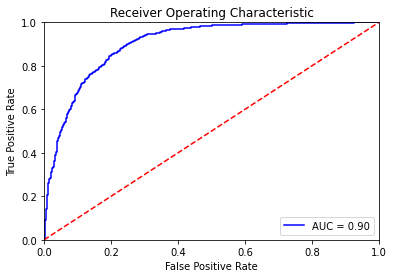

0.902433078762632


In [ ]:

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

## Decision Tree


In [ ]:

dt_clf=DecisionTreeClassifier(random_state=42)

path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

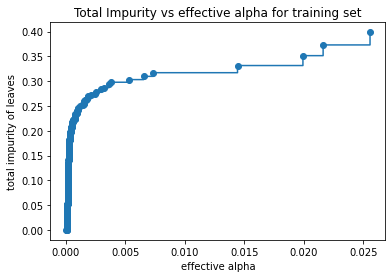

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.09978265991068874


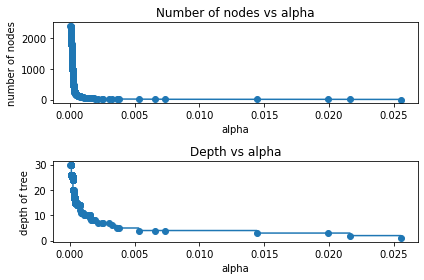

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

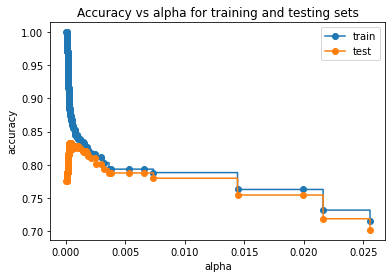

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# Best Tree Pruning Hyper-parameter which maximizes the accuracy of the test 

max_alpha=clfs[np.argmax(test_scores)].ccp_alpha
print(max_alpha)

0.00034451777480800803


In [ ]:
dt_clf=DecisionTreeClassifier(random_state=42,ccp_alpha=0.0025).fit(X_train,y_train)

In [ ]:
y_pred = dt_clf.predict(X_test)

[Text(167.4, 203.85, 'X[6] <= -0.477\ngini = 0.498\nsamples = 8371\nvalue = [4423, 3948]'),
 Text(83.7, 176.67000000000002, 'X[40] <= 1.372\ngini = 0.324\nsamples = 3425\nvalue = [2729, 696]'),
 Text(62.775000000000006, 149.49, 'X[34] <= 3.061\ngini = 0.267\nsamples = 3189\nvalue = [2682, 507]'),
 Text(41.85, 122.31, 'X[6] <= -0.716\ngini = 0.246\nsamples = 3115\nvalue = [2667, 448]'),
 Text(20.925, 95.13, 'gini = 0.107\nsamples = 1674\nvalue = [1579, 95]'),
 Text(62.775000000000006, 95.13, 'X[3] <= -0.054\ngini = 0.37\nsamples = 1441\nvalue = [1088, 353]'),
 Text(41.85, 67.94999999999999, 'gini = 0.208\nsamples = 704\nvalue = [621, 83]'),
 Text(83.7, 67.94999999999999, 'X[28] <= 1.515\ngini = 0.464\nsamples = 737\nvalue = [467, 270]'),
 Text(62.775000000000006, 40.77000000000001, 'X[8] <= -0.178\ngini = 0.439\nsamples = 670\nvalue = [452, 218]'),
 Text(41.85, 13.590000000000003, 'gini = 0.392\nsamples = 569\nvalue = [417, 152]'),
 Text(83.7, 13.590000000000003, 'gini = 0.453\nsamples 

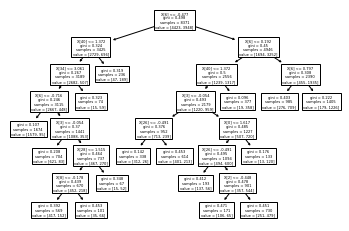

In [ ]:
# Do not use the function if ccp_alpha=0 (default value)
tree.plot_tree(dt_clf)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(1167, 283, 248, 1093)

In [ ]:
sensetivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
print(sensetivity)
print(specificity)

0.8150633855331841
0.8048275862068965


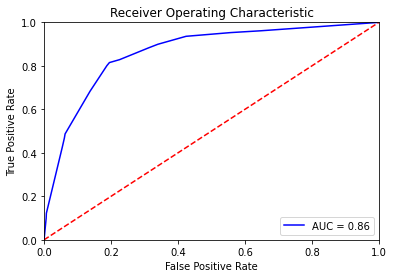

0.8631150196713723


In [ ]:
probs = dt_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, dt_clf.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(roc_auc)

## Random Forest regressor

In [ ]:
rf_clf = RandomForestClassifier( random_state=42)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred=rf_clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(1190, 260, 172, 1169)

In [ ]:
sensetivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
recall = (tp)/(tp+fn)
precision = (tp)/(tp+fp)
f1 = 2*(precision*recall)/(precision+recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(recall)
print(precision)
print(f1)
print(accuracy)

0.8717375093214019
0.8180545836249126
0.8440433212996391
0.8452167681834468


In [ ]:
probs = rf_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9184846614723958


## XGBoost 

In [ ]:
params = {'eta': np.arange(0.1, 0.26, 0.05),
            'min_child_weight': np.arange(1, 5, 0.5).tolist(),
            'gamma': [5],
            'subsample': np.arange(0.5, 1.0, 0.11).tolist(),
            'colsample_bytree': np.arange(0.5, 1.0, 0.11).tolist()
        }

In [ ]:
params={'colsample_bytree': 0.94, 'eta': 0.25000000000000006, 'gamma': 5, 'min_child_weight': 1.5, 'subsample': 0.94}
clf = XGBClassifier(colsample_bytree=0.94,eta=0.25,gamma=5,min_child_weight=1.5,subsample=0.94,objective = "binary:logistic")
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.94, eta=0.25, gamma=5,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1.5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.94, verbosity=1)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(1193, 257, 213, 1128)

In [ ]:
recall = (tp)/(tp+fn)
precision = (tp)/(tp+fp)
f1 = 2*(precision*recall)/(precision+recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(recall)
print(precision)
print(f1)
print(accuracy)

0.8411633109619687
0.8144404332129964
0.8275862068965518
0.8316015764958796


In [ ]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9136964180102343


## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
# accuracy_rate=[]
# for i in range(1,40):
#     knn=KNeighborsClassifier(n_neighbors=i)
#     score=cross_val_score(knn,X_train,y_train,cv=10)
#     accuracy_rate.append(score.mean())
# print(accuracy_rate)

In [ ]:
plt.figure(figsize=(20,12))
plt.plot(range(1,40),accuracy_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='yellow',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

In [ ]:
accuracy_rate=[]
for i in range(1,42,1):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

plt.figure(figsize=(15,10))
plt.plot(range(1,42,1),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='',markersize=10)
plt.title('Accuracy versus K value', fontsize=24)
plt.xlabel('K', fontsize=20)
plt.ylabel('Accuracy rate', fontsize=20)
plt.xlim([0, 42])
plt.tick_params(labelsize=17)
#plt.savefig('knn.png',dpi = 120)
knn = KNeighborsClassifier(n_neighbors=5)


In [ ]:
neigh = KNeighborsClassifier(6).fit(X_train,y_train)

In [ ]:
y_pred=neigh.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(1281, 169, 543, 798)

In [ ]:
recall = (tp)/(tp+fn)
precision = (tp)/(tp+fp)
f1 = 2*(precision*recall)/(precision+recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(recall)
print(precision)
print(f1)
print(accuracy)

0.5950782997762863
0.8252326783867632
0.6915077989601387
0.7448943031171623


In [ ]:
# sensetivity = (tp)/(tp+fn)
# specificity = (tn)/(tn+fp)
# print(sensetivity)
# print(specificity)

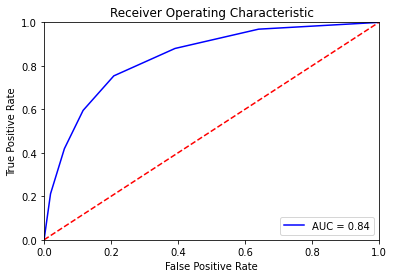

0.8390346884723187


In [ ]:
probs = neigh.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(roc_auc)

## SVM with 5-Fold cross validation

In [ ]:
classifier = SVC(probability=True)
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'kernel':['rbf'], 'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
            {'C':[1,10,100,1000],'kernel': ['poly'], 'degree':[2,3,4]}      ]

In [ ]:
clf = GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=5)
best_clf = clf.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

In [ ]:
sensetivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
print(sensetivity)
print(specificity)

In [ ]:
recall = (tp)/(tp+fn)
precision = (tp)/(tp+fp)
f1 = 2*(precision*recall)/(precision+recall)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(recall)
print(precision)
print(f1)
print(accuracy)

In [ ]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(roc_auc)

## Neural Network (Testing)

In [ ]:
pip install scikit-neuralnetwork

     |████████████████████████████████| 2.8 MB 5.3 MB/s 
     |████████████████████████████████| 125 kB 43.2 MB/s 
  Created wheel for scikit-neuralnetwork: filename=scikit_neuralnetwork-0.7-py3-none-any.whl size=41697 sha256=52a2fb03c2a6c92fd71ff69252e16cc869017f6a9c3f4c3a25a95a6c9ab6fd0f
  Stored in directory: /root/.cache/pip/wheels/7d/42/93/b99bd6392fb56ec7831a695cb7a23dd9c73382b258614b62ed
  Created wheel for Lasagne: filename=Lasagne-0.1-py3-none-any.whl size=79283 sha256=b44145c6e3ae01f5a7d90ec7dfeb4220c18323d3b4e1bea5ca8b172879f538d0
  Stored in directory: /root/.cache/pip/wheels/a3/72/b6/89bbeb6140ee3756fa2bdd2fb03003dd60d289851314b35fd7
  Created wheel for Theano: filename=Theano-1.0.5-py3-none-any.whl size=2668111 sha256=9ec274889b491ae61e6838aba93b055f46024d093f409be32955c74a134392d9
  Stored in directory: /root/.cache/pip/wheels/26/68/6f/745330367ce7822fe0cd863712858151f5723a0a5e322cc144
Successfully built scikit-neuralnetwork Lasagne Theano


In [ ]:
pip install sklearn

In [ ]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

In [ ]:
scaler=MinMaxScaler()
scaler.fit(df.drop(['deposit'],axis=1))
scaled_features=scaler.transform(df.drop('deposit',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,married,single,primary,secondary,tertiary,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,cellular,telephone,apr,aug,feb,jan,jul,jun,mar,may,nov,oct,sep,failure,success,unknown
0,0.532468,1.0,0.104371,0.0,1.0,0.133333,0.268110,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.493506,1.0,0.078273,1.0,1.0,0.133333,0.377675,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.298701,1.0,0.092185,0.0,1.0,0.133333,0.357566,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.480519,1.0,0.105882,0.0,1.0,0.133333,0.148750,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.467532,1.0,0.079851,1.0,1.0,0.133333,0.172983,0.016129,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['deposit'],test_size=0.25, random_state=42)

In [ ]:
X_train

array([[0.54545455, 1.        , 0.16999239, ..., 0.        , 0.        ,
        1.        ],
       [0.42857143, 0.        , 0.07713711, ..., 1.        , 0.        ,
        0.        ],
       [0.12987013, 0.        , 0.0659277 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.22077922, 1.        , 0.09075422, ..., 0.        , 0.        ,
        1.        ],
       [0.42857143, 1.        , 0.08623411, ..., 0.        , 0.        ,
        1.        ],
       [0.15584416, 1.        , 0.07778447, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
input_dim = X_train.shape[1]
nb_classes = 1

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop')

In [ ]:
model.fit(X_train, y_train,epochs=10, batch_size=16, validation_split=0.1,verbose=2)

Epoch 1/10
471/471 - 2s - loss: 0.5631 - val_loss: 0.5016
Epoch 2/10
471/471 - 1s - loss: 0.4420 - val_loss: 0.3995
Epoch 3/10
471/471 - 1s - loss: 0.4033 - val_loss: 0.3817
Epoch 4/10
471/471 - 2s - loss: 0.3884 - val_loss: 0.3729
Epoch 5/10
471/471 - 1s - loss: 0.3739 - val_loss: 0.3802
Epoch 6/10
471/471 - 1s - loss: 0.3687 - val_loss: 0.3913
Epoch 7/10
471/471 - 1s - loss: 0.3632 - val_loss: 0.3652
Epoch 8/10
471/471 - 1s - loss: 0.3580 - val_loss: 0.3633
Epoch 9/10
471/471 - 1s - loss: 0.3576 - val_loss: 0.3724
Epoch 10/10
471/471 - 1s - loss: 0.3562 - val_loss: 0.3774


In [ ]:
y_pred= model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(0, 1450, 0, 1341)

In [ ]:
sensetivity = (tp)/(tp+fn)
specificity = (tn)/(tn+fp)
print(sensetivity)
print(specificity)

1.0
0.0


In [ ]:
pip install eli5

     |████████████████████████████████| 106 kB 5.3 MB/s 


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

def base_model():
    model.add(Dense(128, input_dim=input_dim))
    model.add(Activation('relu'))
    model.add(Dropout(0.15))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.15))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    return model

X = X_train
y = y_train


my_model = KerasClassifier(build_fn=base_model)
print(my_model)

my_model.fit(X,y,epochs=10, batch_size=16, validation_split=0.1)

perm = PermutationImportance(my_model,scoring="accuracy", random_state=42).fit(X,y,epochs=10, batch_size=16, validation_split=0.1)
eli5.show_weights(perm, feature_names = df.drop('deposit',axis=1).columns.tolist())

Epoch 1/10
471/471 [==============================] - 2s 4ms/step - loss: 0.3173 - val_loss: 0.3712
Epoch 2/10
471/471 [==============================] - 2s 3ms/step - loss: 0.3201 - val_loss: 0.3696
Epoch 3/10
471/471 [==============================] - 2s 3ms/step - loss: 0.3168 - val_loss: 0.3701
Epoch 4/10
471/471 [==============================] - 2s 3ms/step - loss: 0.3174 - val_loss: 0.3821
Epoch 5/10
471/471 [==============================] - 2s 3ms/step - loss: 0.3172 - val_loss: 0.3712
Epoch 6/10
471/471 [==============================] - 2s 4ms/step - loss: 0.3128 - val_loss: 0.3755
Epoch 7/10
471/471 [==============================] - 2s 3ms/step - loss: 0.3154 - val_loss: 0.3710
Epoch 8/10
471/471 [==============================] - 1s 3ms/step - loss: 0.3151 - val_loss: 0.3733
Epoch 9/10
471/471 [==============================] - 2s 3ms/step - loss: 0.3144 - val_loss: 0.3742
Epoch 10/10
471/471 [==============================] - 2s 4ms/step - loss: 0.3121 - val_loss: 0.3766

Weight,Feature
0 ± 0.0000,loan
0 ± 0.0000,entrepreneur
0 ± 0.0000,blue-collar
0 ± 0.0000,admin.
0 ± 0.0000,tertiary
0 ± 0.0000,secondary
0 ± 0.0000,primary
0 ± 0.0000,management
0 ± 0.0000,married
0 ± 0.0000,default


In [ ]:
eli5.show_weights(perm, feature_names = df.drop('deposit',axis=1).columns.tolist())

TypeError: ignored

In [ ]:
perm.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])